Notes

Name: Unless you have a well-defined dataset with historical prices for specific car models, using the name may not be practical.

Seller Type: While the seller type can influence the price, it might not be a primary factor, and including it may lead to overcomplicating the model.

# Project I ML 
### Yahia Ehab Mohamed 7037125
### Ahmed Shehata 7005537

## Data Preparation

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('Dataset_ML/Train.csv')
test_data = pd.read_csv('Dataset_ML/Test.csv')

train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


## Data Exploration

### Encoding

#### Label Encode

In [3]:
#Apply One Hot Encoding to the categorical data in the dataset
train_data = pd.get_dummies(train_data, columns=['transmission', 'owner','fuel'])
test_data = pd.get_dummies(test_data, columns=['transmission', 'owner','fuel'])

train_data.head()

,name,year,selling_price,km_driven,seller_type,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,0,1,1,0,0,0,0,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,0,1,0,0,1,0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,0,1,0,0,0,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,0,1,1,0,0,0,0,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,0,1,1,0,0,0,0,0,0,0,1


### Explore Data Set

In [4]:
train_data.head()

,name,year,selling_price,km_driven,seller_type,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Individual,0,1,1,0,0,0,0,0,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Individual,0,1,0,0,1,0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Individual,0,1,0,0,0,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Individual,0,1,1,0,0,0,0,0,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Individual,0,1,1,0,0,0,0,0,0,0,1


In [5]:
test_data.head()

,name,year,selling_price,km_driven,seller_type,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,Maruti 800 AC,2007,60000,70000,Individual,0,1,1,0,0,0,0,0,0,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,0,1,1,0,0,0,0,0,0,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,0,1,1,0,0,0,0,0,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Individual,0,1,1,0,0,0,0,0,0,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,0,1,0,0,1,0,0,0,1,0,0,0


### Check For Missing Values

In [6]:
train_data.info()

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   name                        8128 non-null   object
 1   year                        8128 non-null   int64 
 2   selling_price               8128 non-null   int64 
 3   km_driven                   8128 non-null   int64 
 4   seller_type                 8128 non-null   object
 5   transmission_Automatic      8128 non-null   uint8 
 6   transmission_Manual         8128 non-null   uint8 
 7   owner_First Owner           8128 non-null   uint8 
 8   owner_Fourth & Above Owner  8128 non-null   uint8 
 9   owner_Second Owner          8128 non-null   uint8 
 10  owner_Test Drive Car        8128 non-null   uint8 
 11  owner_Third Owner           8128 non-null   uint8 
 12  fuel_CNG                    8128 non-null   uint8 
 13  fuel_Diesel                 8128 non-null   uint

,year,selling_price,km_driven,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,0.129183,0.870817,0.650714,0.021407,0.258981,0.000615,0.068282,0.007013,0.541585,0.004675,0.446727
std,4.044249,8.062534e+05,5.655055e+04,0.335423,0.335423,0.476774,0.144747,0.438102,0.024796,0.252246,0.083453,0.498298,0.068220,0.497185
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2017.000000,6.750000e+05,9.800000e+04,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2020.000000,1.000000e+07,2.360457e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_data.info()

test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   name                        4340 non-null   object
 1   year                        4340 non-null   int64 
 2   selling_price               4340 non-null   int64 
 3   km_driven                   4340 non-null   int64 
 4   seller_type                 4340 non-null   object
 5   transmission_Automatic      4340 non-null   uint8 
 6   transmission_Manual         4340 non-null   uint8 
 7   owner_First Owner           4340 non-null   uint8 
 8   owner_Fourth & Above Owner  4340 non-null   uint8 
 9   owner_Second Owner          4340 non-null   uint8 
 10  owner_Test Drive Car        4340 non-null   uint8 
 11  owner_Third Owner           4340 non-null   uint8 
 12  fuel_CNG                    4340 non-null   uint8 
 13  fuel_Diesel                 4340 non-null   uint

,year,selling_price,km_driven,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.103226,0.896774,0.652535,0.018664,0.254839,0.003917,0.070046,0.009217,0.496083,0.000230,0.005300,0.489171
std,4.215344,5.785487e+05,46644.102194,0.304289,0.304289,0.476220,0.135349,0.435821,0.062471,0.255254,0.095571,0.500042,0.015179,0.072613,0.499940
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Drop non matching rows

In [8]:
#Drop fuel_Electric column from test set as it is not present in train set
test_data.drop(['fuel_Electric'], axis=1, inplace=True)


#### Drop Nan 

In [9]:
#Drop Nan values from train set
train_data.dropna(inplace=True)

#Drop Nan values from test set
test_data.dropna(inplace=True)

## Linear Regression

### Model Setup

#### Data Split

In [10]:
#Split the dataset into train and test set
x_train = train_data.drop(['selling_price','name','seller_type'], axis=1)
y_train = train_data['selling_price']

x_test = test_data.drop(['selling_price','name','seller_type'], axis=1)
y_test = test_data['selling_price']

### Multi-Feature Equation

#### Train

In [11]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()

#Fit the model
model_LR.fit(x_train, y_train)

#Predict the test set
y_pred_LR = model_LR.predict(x_test)

#### Test

In [12]:
#Predict the train set
yPred_LR = model_LR.predict(x_test)

yPred_LR

array([ -9586.42786655,  12461.99727665, 558306.60984841, ...,
       -15044.2528224 , 748710.94063465, 427091.47583121])

#### Accuracy Comparison

In [13]:
#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_test,yPred_LR)
rmse_LR = np.sqrt(mse_LR)
print("MSE: ",mse_LR)
print("RMSE: ",rmse_LR)

#MAE
from sklearn.metrics import mean_absolute_error
mae_LR = mean_absolute_error(y_test,yPred_LR)
print("MAE: ",mae_LR)

MSE:  230276264993.2554
RMSE:  479871.09205833124
MAE:  282071.3151055223


### Gradient Descent

In [14]:
import numpy as np

# Generate some synthetic data for demonstration purposes
np.random.seed(0)
X = 2 * np.random.rand(100, 3)  # 100 data points with 3 features
y = 4 + np.dot(X, np.array([3, 2, 1])) + np.random.randn(100)

# Normalize the features (optional, but often recommended)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Initialize model parameters (weights and bias)
num_features = X.shape[1]
theta = np.random.randn(num_features)
bias = np.random.randn()

# Set hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Define the cost function (mean squared error)
def cost_function(X, y, theta, bias):
    predictions = np.dot(X, theta) + bias
    error = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(error**2)
    return cost

# Gradient Descent
for epoch in range(num_epochs):
    # Compute predictions
    predictions = np.dot(X, theta) + bias
    
    # Compute the gradient for weights and bias
    dtheta = (1 / len(y)) * np.dot(X.T, (predictions - y))
    dbias = (1 / len(y)) * np.sum(predictions - y)
    
    # Update model parameters
    theta -= learning_rate * dtheta
    bias -= learning_rate * dbias
    
    # Calculate and print the cost for monitoring
    cost = cost_function(X, y, theta, bias)
    print(f"Epoch {epoch+1}, Cost: {cost}")

print("Final Weights (theta):", theta)
print("Final Bias (bias):", bias)



Epoch 1, Cost: 43.00191207270567
Epoch 2, Cost: 42.14381442471295
Epoch 3, Cost: 41.303051423254075
Epoch 4, Cost: 40.4792720388863
Epoch 5, Cost: 39.6721323697983
Epoch 6, Cost: 38.88129549664777
Epoch 7, Cost: 38.1064313403654
Epoch 8, Cost: 37.34721652286421
Epoch 9, Cost: 36.603334230594875
Epoch 10, Cost: 35.87447408088843
Epoch 11, Cost: 35.16033199102942
Epoch 12, Cost: 34.46061005000337
Epoch 13, Cost: 33.77501639286377
Epoch 14, Cost: 33.10326507766503
Epoch 15, Cost: 32.44507596490853
Epoch 16, Cost: 31.800174599450504
Epoch 17, Cost: 31.168292094821172
Epoch 18, Cost: 30.549165019905768
Epoch 19, Cost: 29.942535287939055
Epoch 20, Cost: 29.348150047765877
Epoch 21, Cost: 28.76576157732136
Epoch 22, Cost: 28.19512717928536
Epoch 23, Cost: 27.636009078866465
Epoch 24, Cost: 27.088174323672074
Epoch 25, Cost: 26.5513946856218
Epoch 26, Cost: 26.025446564862214
Epoch 27, Cost: 25.510110895642207
Epoch 28, Cost: 25.005173054108553
Epoch 29, Cost: 24.51042276798259
Epoch 30, Cost:

#### Accuracy Comparison

In [15]:

#RMSE & MSE
from sklearn.metrics import mean_squared_error
mse_LR = mean_squared_error(y_test,yPred_LR)
rmse_LR = np.sqrt(mse_LR)
print("MSE: ",mse_LR)
print("RMSE: ",rmse_LR)

#MAE
from sklearn.metrics import mean_absolute_error
mae_LR = mean_absolute_error(y_test,yPred_LR)
print("MAE: ",mae_LR)

MSE:  230276264993.2554
RMSE:  479871.09205833124
MAE:  282071.3151055223


## Polynomial Regression

RMSE for degree 1 is 479871.0920583101
RMSE for degree 2 is 30483290.301591437
RMSE for degree 3 is 38032437.39817267
RMSE for degree 4 is 847054.5191491463


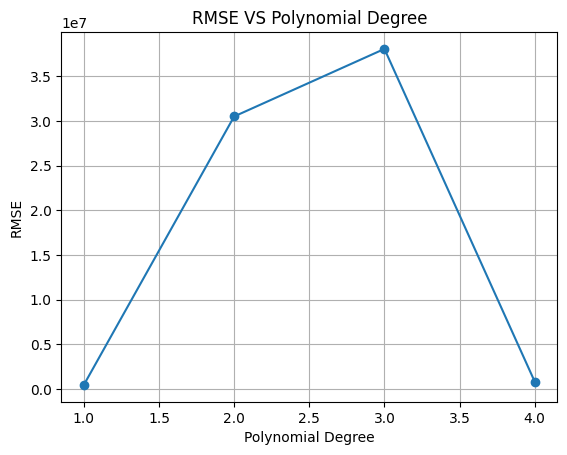

array([1, 2, 3, 4])

In [19]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


rmse_Values = [] #List to store the RMSE values for different degree of polynomial
degrees = list(range(1, 11)) #List to store the degree of polynomial

for i in range(1,11):
    poly_features = PolynomialFeatures(degree=i) #Create a PolynomialFeatures object of degree i
    X_train_poly = poly_features.fit_transform(x_train) #Transform the training set
    X_test_poly = poly_features.transform(x_test) #Transform the test set
    poly_model = LinearRegression() #Create a LinearRegression object
    poly_model.fit(X_train_poly, y_train) #Fit the model on the training set
    y_pred_poly = poly_model.predict(X_test_poly) #Predict the test set
    rmse = np.sqrt(mean_squared_error(y_test,y_pred_poly)) #Calculate the RMSE value
    rmse_Values.append(rmse) #Append the RMSE value to the list
    print("RMSE for degree "+str(i)+" is "+str(rmse)) #Print the RMSE value

#Change list to array to plot the values
rmse_Values = np.array(rmse_Values)
degrees = np.array(degrees) 


#Plotting the RMSE values with degree
import matplotlib.pyplot as plt
plt.figure() #Create a new figure
plt.plot(degrees,rmse_Values,marker='o') #Plot the RMSE values
plt.title('RMSE VS Polynomial Degree') #Set the title of the plot
plt.xlabel('Polynomial Degree') #Set the x label of the plot
plt.ylabel('RMSE') #Set the y label of the plot
plt.grid(True) #Set the grid for the plot
plt.show() #Display the plot